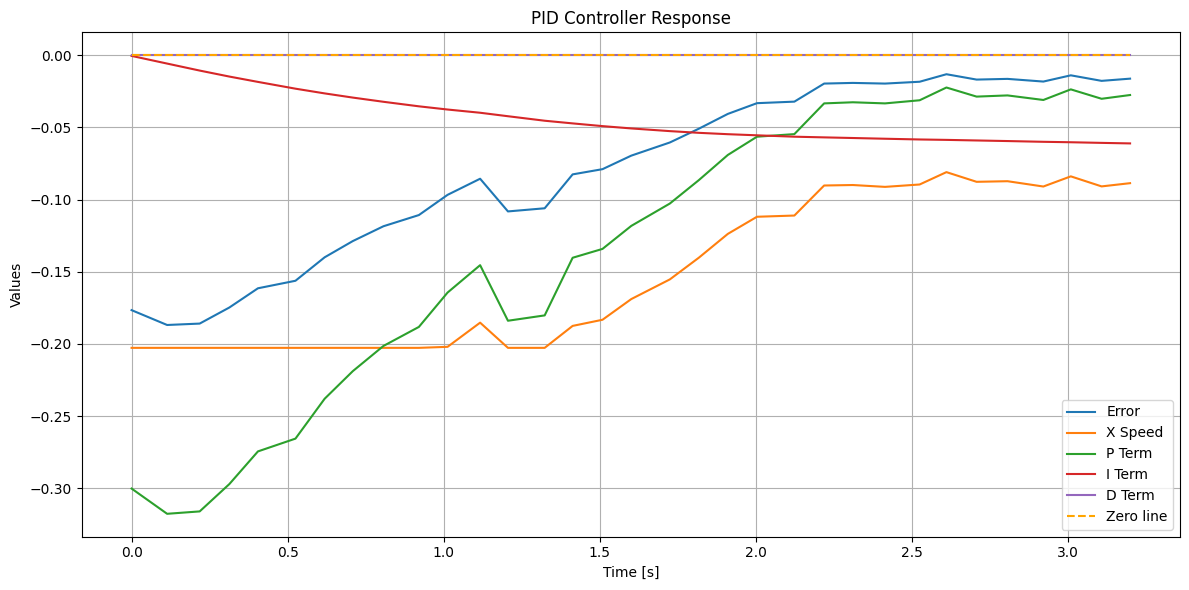

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df1 = pd.read_csv("pid/pid_2025-08-05_23-32-29.csv")
#df2 = pd.read_csv("pid/pid_2025-07-21_12-50-14.csv")
#df3 = pd.read_csv("pid/pid_2025-07-21_13-13-11.csv")

df = df1

# Optional: convert raw timestamp to relative time
df["relative_time"] = df["time"] - df["time"].iloc[0]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["relative_time"], df["error"], label="Error")
plt.plot(df["relative_time"], df["x_speed"], label="X Speed")
plt.plot(df["relative_time"], df["p_term"], label="P Term", linestyle="-")
plt.plot(df["relative_time"], df["i_term"], label="I Term", linestyle="-")
plt.plot(df["relative_time"], df["d_term"], label="D Term", linestyle="-")
plt.plot(df["relative_time"], len(df["x_speed"])*[0], label="Zero line", linestyle='--', color="orange")
#plt.plot(df["relative_time"], df["alpha"], label="Alpha")


plt.xlabel("Time [s]")
plt.ylabel("Values")
plt.title("PID Controller Response")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

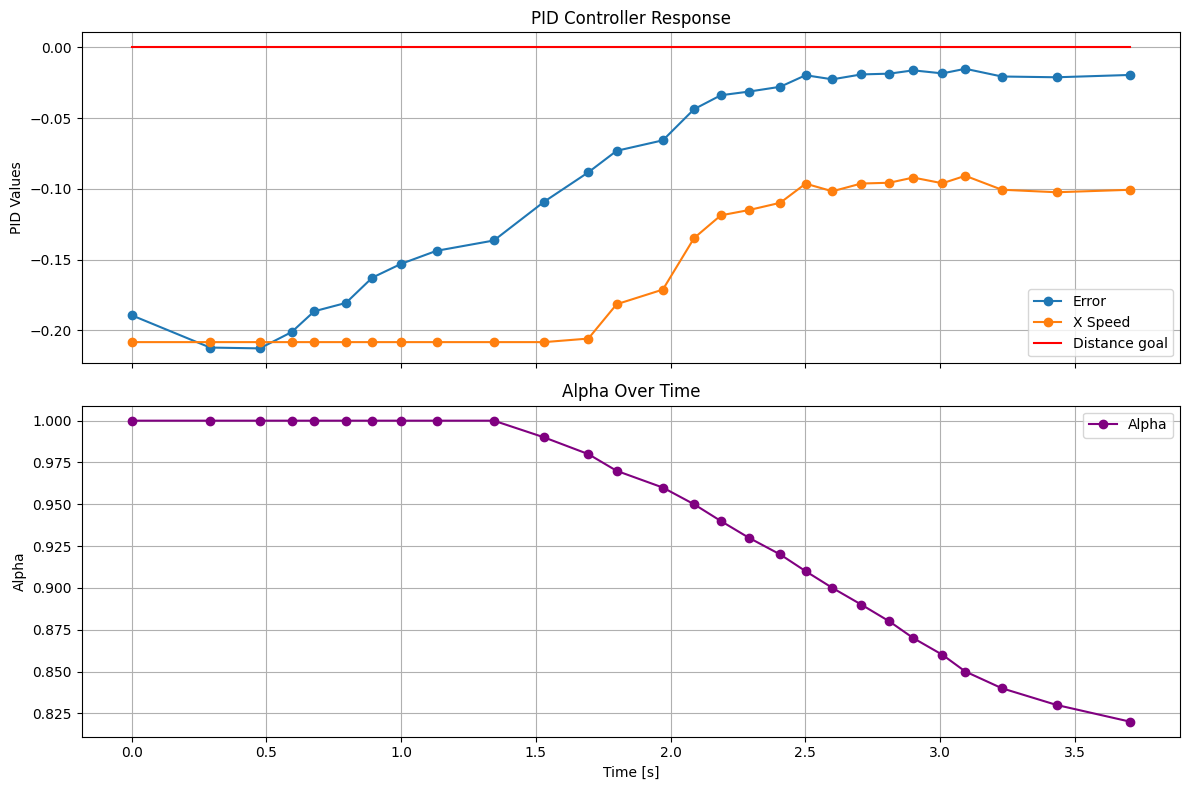

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("pid/pid_2025-08-05_23-21-20.csv")

# Optional: convert raw timestamp to relative time
df["relative_time"] = df["time"] - df["time"].iloc[0]

# Create subplots: 2 rows, 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First plot: PID components and x_speed
ax1.plot(df["relative_time"], df["error"], label="Error", marker='o', linestyle='-')
ax1.plot(df["relative_time"], df["x_speed"], label="X Speed", marker='o', linestyle='-')
ax1.plot(df["relative_time"], len(df["x_speed"])*[0], label="Distance goal", linestyle='-', color="red")
#ax1.plot(df["relative_time"], df["p_term"], label="P Term", linestyle="--")
#ax1.plot(df["relative_time"], df["i_term"], label="I Term", linestyle="--")
#ax1.plot(df["relative_time"], df["d_term"], label="D Term", linestyle="--")
ax1.set_ylabel("PID Values")
ax1.set_title("PID Controller Response")
ax1.legend()
ax1.grid(True)

# Second plot: Alpha
ax2.plot(df["relative_time"], df["alpha"], label="Alpha", color="purple", marker='o', linestyle='-')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Alpha")
ax2.set_title("Alpha Over Time")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


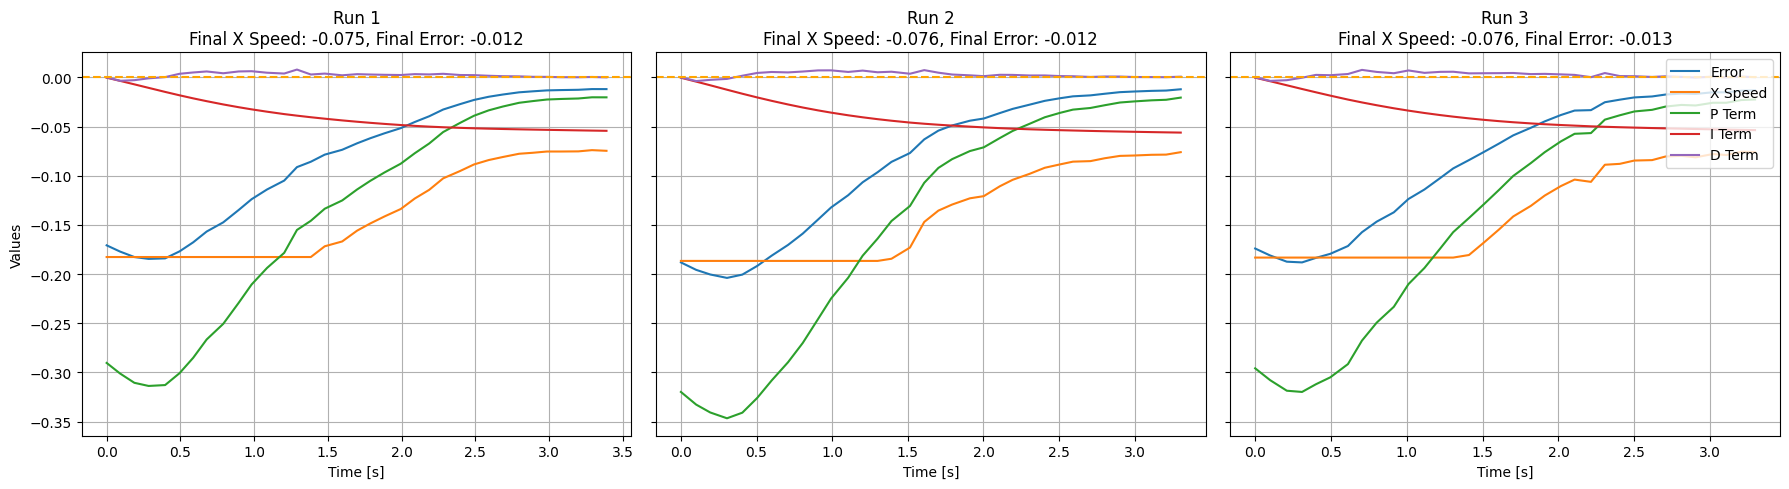

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
df1 = pd.read_csv("pid/pid_2025-07-21_12-31-09.csv")
df2 = pd.read_csv("pid/pid_2025-07-21_12-50-14.csv")
df3 = pd.read_csv("pid/pid_2025-07-21_13-13-11.csv")

dfs = [df1, df2, df3]
titles = ["Run 1", "Run 2", "Run 3"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, (df, ax) in enumerate(zip(dfs, axes)):
    df["relative_time"] = df["time"] - df["time"].iloc[0]
    final_x_speed = df["x_speed"].iloc[-1]
    final_error = df["error"].iloc[-1]

    ax.plot(df["relative_time"], df["error"], label="Error")
    ax.plot(df["relative_time"], df["x_speed"], label="X Speed")
    ax.plot(df["relative_time"], df["p_term"], label="P Term", linestyle="-")
    ax.plot(df["relative_time"], df["i_term"], label="I Term", linestyle="-")
    ax.plot(df["relative_time"], df["d_term"], label="D Term", linestyle="-")
    ax.axhline(0, color="orange", linestyle="--", label="Zero line" if i == 0 else "")  # avoid duplicate labels

    ax.set_title(f"{titles[i]}\nFinal X Speed: {final_x_speed:.3f}, Final Error: {final_error:.3f}")
    ax.set_xlabel("Time [s]")
    ax.grid(True)
    if i == 0:
        ax.set_ylabel("Values")
    if i == 2:
        ax.legend(loc="upper right")

plt.tight_layout()
plt.show()
